# Approaching almost any regression problem


As a beginner,we all first learn about regression and classification techniques.So, i decided to make a notebook to demonstrate how to effectively approach a machine learning regression problem.

<img src="https://miro.medium.com/max/1400/1*KwdVLH5e_P9h8hEzeIPnTg.png" alt="regression">

# Importing and Analysing the data
Here, we will first import our data and analyse the data,like if there is any null values,is data is uniform and other stuffs


<img src="http://cartmigration.com/wp-content/uploads/2019/07/How-to-import-data-from-CSV-to-dream-shopping-cart.jpg" alt="regression">

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv")
data.head()

In [ ]:
data.describe()

# Data Visualization

For data visualization,there are many libraries which we can use for Ploting.Some of them are:

* matplotlib
* seaborn 
* plotly

For the sake of time,we can use pairplot to have a quick visualization of data
<img src="https://airsouthasia.files.wordpress.com/2018/08/plotly-logo-01-square.png" alt="regression">
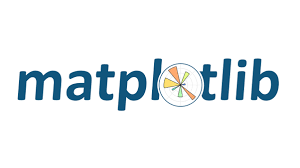
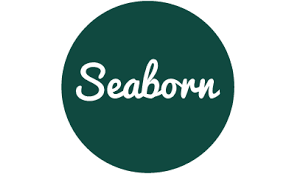


In [ ]:
import seaborn as sns
sns.pairplot(data)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.distplot(data['price'],color="y")

In [ ]:
sns.jointplot(x="wheelbase",y="price",data=data,kind='kde',color='red')

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data['enginelocation'])

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data.enginelocation,data['price'],color=['c'])

Will discuss about info() later in this notebook

In [ ]:
data.info()

# Encoding

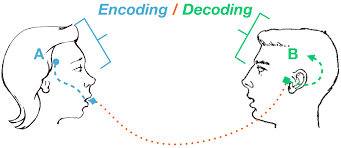
<br>
This is one of the most common things that we perform in datasets.In Data Science and Machine Learning,we use encoding to convert categorical data into integers.Some of the most common ways for encoding are:

* OneHotEncoder

* LabelEncoder

* pandas.get_dummies

Here, i will be using LabelEncoder which i found the simplest among the mentioned three


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['fuelsystem']=lab.fit_transform(data['fuelsystem'])
data['cylindernumber']=lab.fit_transform(data['cylindernumber'])
data['enginetype']=lab.fit_transform(data['enginetype'])
data['enginelocation']=lab.fit_transform(data['enginelocation'])
data['drivewheel']=lab.fit_transform(data['drivewheel'])
data['carbody']=lab.fit_transform(data['carbody'])
data['doornumber']=lab.fit_transform(data['doornumber'])
data['aspiration']=lab.fit_transform(data['aspiration'])
data['fueltype']=lab.fit_transform(data['fueltype'])
data['CarName']=lab.fit_transform(data['CarName'])

In [ ]:
data.head()

# Handling missing data

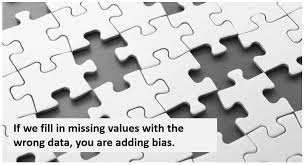

<br>
 
In data science, most of the time we ran into datasets having some null values.One of the frequent approaches we use to use missing data is imputing,but there are other ways like creating a function of your own.

As this dataset doesnot have any null values,i will be discussing more about the ways to find if there are any null values in your dataset.Some of the most common ways are:

* dataset.info(): Gives the amount of non-null and type of each column in dataframe.
* missingno: I learned about this library recently from someone's kernel,i don't remmber his/her name.I will be givng a small demo of missingno here

In [ ]:
import missingno as msno
msno.dendrogram(data)

# Handling outliers

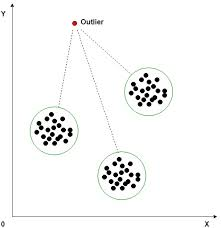

<br>

Outliers are the values which lie out of a certain range in which it should be.

For ex., consider :
```
a=[10,20,30,100000,40]
```

Here, 100000 can be treated as outlier in a,because of a huge difference with other data points.

There are many ways of doing so.Some of them are:

* Z-score
* IQR(interquartile range )
* Rank

I will be using a rank method here to deal with outliers.

I will also use Boxplot to show the outliers in a column.(**dots in boxplot represent outliers**)

In [ ]:
sns.boxplot(data['enginesize'],color='red')

In [ ]:
data['enginesize']=data['enginesize'].rank()

# After rank method

In [ ]:
sns.boxplot(data['enginesize'],color='red')

After the rank method, we can see that there are no outliers in that column.Thus,one caan deal with outliers in the same way

# Correlation Matrix

A correlation matrix is used to find correlation between each column in dataset.I will show two ways to plot a correlation matrix

In [ ]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))

# Building a Machine Learning Model

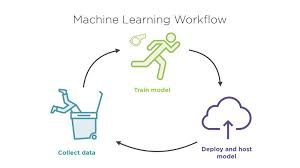

<br>

Here we will perform tasks like splitting the data,applying machine learning algorithms and predict the output.

One of the best performing models for most of time are:

* RandomForest
* XGBoost
* Lightgbm

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
x=data.drop(['car_ID','price'],axis=1)
y=data['price']
xr,xt,yr,yt=train_test_split(x,y,test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.pipeline import make_pipeline

In [ ]:
mod=LGBMRegressor(n_estimators=40)
model=make_pipeline(mod)
model.fit(x,y)
print(model)
kfold=KFold(n_splits=5)
score=cross_val_score(model,x,y,cv=kfold)
print(score)
yp=model.predict(xt)
print(r2_score(yt,yp))
print(mean_squared_error(yt,yp))
print(mean_squared_log_error(yt,yp))

In [ ]:
mod=RandomForestRegressor(n_estimators=100)
model=make_pipeline(mod)
print(model)
kfold=KFold(n_splits=5)
model.fit(x,y)
score=cross_val_score(model,x,y,cv=kfold)
print(score)
yp=model.predict(xt)
print(r2_score(yt,yp))
print(mean_squared_error(yt,yp))
print(mean_squared_log_error(yt,yp))

# Saving models in ML 

In [ ]:
import pickle

pkl_path = "./Car.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(model, f)

In [ ]:
import pickle
pkl_path = './Car.pkl'
with open(pkl_path, 'rb') as f:
    model = pickle.load(f)

In [ ]:
xgb1 = XGBRegressor()
parameters = {'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,parameters,cv = 2)

xgb_grid.fit(x,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
yp=xgb_grid.predict(xt)
print(r2_score(yt,yp))
print(mean_squared_error(yt,yp))
print(mean_squared_log_error(yt,yp))

# Thanks for viewing this

<img src="https://media0.giphy.com/media/3oEdva9BUHPIs2SkGk/giphy.gif">

